# Régression Polynomiale, courbes d'apprentissage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas as pd
np.random.seed(42)

**Question** Vous avez un ensemble d'entraînement disponible dans dans `data.csv`. Le charger dans un dataframe `df_train`.

In [2]:
df_train = pd.read_csv("data.csv")

**Question** Regarder les 5 premières lignes et afficher des statistiques descriptives,  tracer l'ensemble des points en mettant la variable à prédire `t` en ordonnée. Vous pouvez appeler `X` et `y` les objets contenant la description des données et la variable à prédire

In [3]:
df_train.head(5)

,x,t
0,0.140280,9.880310
1,0.903858,10.227492
2,0.535815,10.163115
3,0.358392,9.937107
4,0.024342,9.881466


In [4]:
df_train.describe()

,x,t
count,50.000000,50.000000
mean,0.280633,9.994401
std,0.291519,0.150313
min,0.000424,9.739527
25%,0.033771,9.884021
50%,0.190155,9.962842
75%,0.422793,10.033667
max,0.940725,10.380997


In [5]:
X, y = np.array(df_train[["x"]]), np.array(df_train[["t"]])

**Question** Découpez `X` et `y` en 2/3 et 1/3 pour créer des ensembles d'entraînement et de validation

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=2/3)

**Question** Faire une régression lineaire sur ce jeu de données d'entraînement et estimer son score sur l'échantillon de validation. 

In [7]:
from sklearn import linear_model as lm
reg = lm.LinearRegression()
reg.fit(X=X_train, y=y_train)
print("a0 = ", reg.intercept_)
print("a1 = ", reg.coef_)
print("score =", reg.score(X_test, y_test))

a0 =  [9.9002862]
a1 =  [[0.35468433]]
score = 0.38765059933087564


**Question** Tracer dans un diagramme, les points en bleu pour les données d'apprentissage, en rouge pour les données de validation et en noir la droite de régression qui vient d'être calculée.

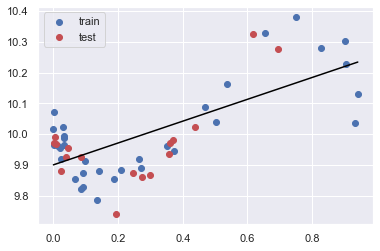

In [8]:
plt.scatter(X_train, y_train, color="b", label="train")
plt.scatter(X_test, y_test, color="r", label="test")
x = np.linspace(X.min(), X.max(), 100).reshape(100,1)
plt.plot(x, reg.predict(x), color="black")
plt.legend()
plt.show()

## Ajouter des attributs, régression polynomiale

**Question** Dans les attributs décrivant les données, ajouter le carré de `X`. On doit avoir après cette manipulation `X2_train` et  `X2_valid` de dimensions (50,2)

In [9]:
df_train2 = df_train.copy()
df_train2.insert(1,"x**2",X**2)
df_train2.head()

,x,x**2,t
0,0.140280,0.019679,9.880310
1,0.903858,0.816959,10.227492
2,0.535815,0.287098,10.163115
3,0.358392,0.128445,9.937107
4,0.024342,0.000593,9.881466


In [10]:
X2 = np.array(df_train2[["x", "x**2"]])
y2 = np.array(df_train2[["t"]])
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=2/3)

**Question** Réentraîner le classifieur linéaire avec cette nouvelle description des données (donc les attributs $x$ et $x^2$).

In [11]:
reg2 = lm.LinearRegression()
reg2.fit(X=X2_train, y=y2_train)
print("a0 = ", reg2.intercept_)
print("a1, a2 = ", reg2.coef_)
print("score =", reg2.score(X2_test, y2_test))

a0 =  [9.92958927]
a1, a2 =  [[0.07704176 0.31214341]]
score = 0.6005074694152126


**Question** Tracer maintenant dans un diagamme, les points en bleu pour les données d'apprentissage, en rouge pour les données de test et en noir la courbe de régression qui vient d'être calculée.

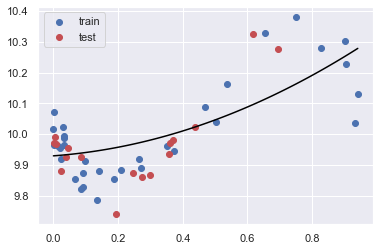

In [12]:
plt.scatter(X_train, y_train, color="b", label="train")
plt.scatter(X_test, y_test, color="r", label="test")
x = np.linspace(X.min(), X.max(), 100).reshape(100,1)
xx = np.concatenate((x,x**2), axis=1)
plt.plot(x, reg2.predict(xx), color="black")
plt.legend()
plt.show()

**Question** Écrire maintenant une fonction `poly` qui prend en argument un jeu de données `X` et un degré `d` et qui calcule une nouvelle représentation avec tous les monômes entre 1 et `d`.

    # Exemple : 
    poly(X, 3)
    array([[1.40280301e-01, 1.96785627e-02, 2.76051470e-03],
       [9.03857692e-01, 8.16958728e-01, 7.38414431e-01],
       [5.35815131e-01, 2.87097854e-01, 1.53831374e-01],
       [3.58391981e-01, 1.28444812e-01, 4.60335905e-02],
       [2.43418162e-02, 5.92524014e-04, 1.44231106e-05],
       [2.43342904e-02, 5.92157688e-04, 1.44097371e-05], ...

In [13]:
def poly(X,d):
    assert isinstance(d, int) and d>=0
    res = X
    for k in range(2,d+1):
        res = np.concatenate((res,X**k), axis=1)
    return res

**Question** Construire une liste avec tous les scores de la régression pour 20 représentations des données comprenant tous les monômes de 1 à 20 : (le $i^e$ résultat contient tous les monômes de 1 à $i$).

In [14]:
list_score = []
for i in range(1,20+1):
    Xi = poly(X,i)
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, y, train_size=2/5)
    regi = lm.LinearRegression()
    regi.fit(Xi_train, yi_train)
    list_score.append(regi.score(Xi_test, yi_test))
list_score

[0.3869375325322929,
 0.3050415666892001,
 0.8971095760259482,
 0.8661879908669206,
 0.8649418212708071,
 0.740608835514559,
 -4844.379400765094,
 -8.398850033317604,
 0.7049667764617331,
 -0.27749883674547116,
 -1.8490446981852315,
 -6801445.498606407,
 -12.351508911175824,
 -8899.482766186802,
 -8.40795151072164e+18,
 -1070112536215.6302,
 -4265697824408.7876,
 -110172629323.47588,
 -75231415746.65561,
 -1.2665625193898032e+16]

**Question** Que constatez-vous. Pouvez-vous expliquer ce qui se produit ? Pourquoi les résultats se dégradent-ils quand la représentation des données est de plus en plus riche ?  

<font color='blue'/>
On fait du sur-apprentissage

On va refaire cela avec les outils de scikit-learn.

**Question** importez `PolynomialFeatures` de `sklearn.preprocessing`. Utilisez cela pour créer une représentation de X avec le degré 3. Cela donne quelque chose comme : 

     array([[1.00000000e+00, 1.73907352e-01, 3.02437672e-02, 5.25961348e-03],
       [1.00000000e+00, 5.18867376e-01, 2.69223354e-01, 1.39691215e-01],
       [1.00000000e+00, 1.30815988e-08, 1.71128228e-16, 2.23863083e-24],
       [1.00000000e+00, 9.14049845e-02, 8.35487119e-03, 7.63676871e-04],
       [1.00000000e+00, 2.15372915e-02, 4.63854925e-04, 9.99017872e-06], ...

In [15]:
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
poly = PolyFeat(3)
#poly.fit_transform(X)

*Aide* En python, on peut donner en argument un dictionnaire de paramètres 

In [16]:
dic = {'loc':5, 'scale':2}
print(np.random.normal(size=5, **dic))

def f(x, **kwargs):
    return [i>0 for i in np.random.normal(size=x, **kwargs)]

print(f(10))
print(f(10, loc=20))
print(f(10, loc=20, scale=100))
dic = {'loc':5, 'scale':2}
print(f(10,**dic))

[2.81721913 3.36599712 8.01954262 5.80406896 4.30494653]
[True, True, False, False, False, True, True, True, True, False]
[True, True, True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, False, False, True, True]
[True, True, True, True, True, True, True, True, True, True]


**Question** Il existe une fonction `make_pipeline` dans `sklearn` qui permet d'enchaîner des opérations très simplement. Définissez une nouvelle fonction `ma_regression` qui prend en argument un degré et une liste d'autres arguments destinés à la fonction `LinearRegression` et compose un changement de représentation polynomial et une régression.

In [17]:
from sklearn.pipeline import make_pipeline

def ma_regression_test(d,**kwargs):
    assert isinstance(d, int) and d>=0
    assert isinstance(kwargs, dict)
    #transformateur :
    poly = PolyFeat(d)
    X_transform = poly.fit_transform(kwargs["X"])
    #modèle :
    modele = lm.LinearRegression()
    modele.fit(X_transform, kwargs["y"])
    return modele

d = 3
args = {"X":X_train, "y":y_train}
reg = ma_regression_test(3, **args)
X_test_transform = PolyFeat(3).fit_transform(X_test)
reg.score(X_test_transform, y_test)

0.9050377687293201

In [18]:
def ma_regression(d=1):
    model = make_pipeline(PolyFeat(d),
                           lm.LinearRegression())
    return model

regr = ma_regression(3).fit(X_train, y_train)
regr.score(X_test, y_test)

0.9050377687293201

**Question**  Utilisez cette fonction pour estimer l'erreur d'une regression linéaire avec transformations polynomiales jusqu'au degré 3.

In [19]:
for k in range(1,3+1):
    rg = ma_regression(k).fit(X_train, y_train)
    print(f"d° = {k} -> score = {rg.score(X_test, y_test)}")

d° = 1 -> score = 0.38765059933087775
d° = 2 -> score = 0.466081656964889
d° = 3 -> score = 0.9050377687293201


## Courbe d'apprentissage en fonction du degré

**Question** En utilisant `validation_curve`, réaliser une validation croisée 5 fois sur `X_train` en appliquant tous les changements de représentation avec un degré entre 1 et `max_degree` que nous fixons à 15. Pour cela, regardez l'aide de `validation_curve` dans `sklearn.model_selection`. Utilisez bien-sûr `ma_regression`. Cela donne des scores de validation comme cela :

     [[ 0.49293082  0.66030384  0.65039394  0.69193837  0.6167657 ]
      [ 0.57202662  0.66235604  0.60475979  0.73104306  0.61910942]
      ...
      [ 0.87350381  0.93056784 -0.56590723  0.87945086  0.87330041]]

*Aide* : Dans les pipelines, on accède aux paramètres des éléments du pipeline avec la syntaxe `element__parametre`. Par défaut le nom de l'élément est le nom de la classe en minuscules.

In [20]:
from sklearn.model_selection import validation_curve as valid_curv
#valid_curv?

In [21]:
degree = np.arange(1,15+1)
train_scores, test_scores = valid_curv(estimator=ma_regression(), X=X, y=y, cv=5,
                                       param_name="polynomialfeatures__degree", param_range=degree)

**Question** On peut donc ensuite tracer les courbes d'erreur d'entraînement et de validation. Puisqu'on a de la validation sur 5 parties, on obtient 5 résultats par degré. Pour la courbe on trace la valeur mediane (la moyenne sur 5 valeurs pouvant être plus fortement affectée par un très bon ou très mauvais résultat. Cela doit ressembler à cela. 

![validation et train](./validtrain.png)

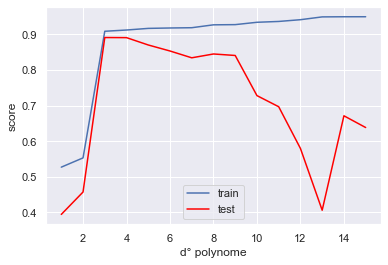

In [22]:
plt.plot(degree, np.median(train_scores, axis=1), label="train")
plt.plot(degree, np.median(test_scores, axis=1), color='red', label="test")
plt.xlabel('d° polynome')
plt.ylabel('score')
plt.legend()
plt.show()

**Question** Quelle est votre interprétation des résultats observés?

<font color='blue'/>
On constate les scores du modèle pour les données `train` et `test` sont à leurs maximums pour un degrés de polynôme `d°=3`, nous donnant 90% de perfomance. Au-delà, on fait de fait de l'overfitting, ce qui diminue la performance de notre modèle.

**Question** tracer maintenant la figure montrant la courbe estimée et les points dans l'échantillon de valid et de train. Pour cela, j'ai utilisé `linspace` pour obtenir 100 points espacés régulièrement de l'intervalle $[min(X),max(X)]$, j'ai calculé leur prédiction et utilisé `plot` pour tracer la courbe et `scatter` avec l'option `s` pour changer la taille des points. Par exemple pour le degré 3 cela donne cela, mais regardez pour plusieurs valeurs des degrés

![courbe finale](courbefinale.png)

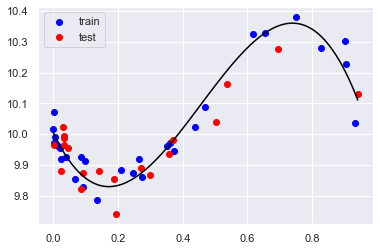

In [23]:
x = np.linspace(X.min(), X.max(), 100).reshape(100,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2/5)
reg = ma_regression(3)
reg.fit(X_train, y_train)

plt.scatter(X_train, y_train, color="blue", label="train")
plt.scatter(X_test, y_test, color="red", label="test")
plt.plot(x, reg.predict(x), color="black")
plt.legend()
plt.show()

## Courbe d'apprentissage en fonction de la taille de l'échantillon

Regardons maintenant la courbe d'apprentissage en fonction de la taille de l'échantillon. 

**Question** Lire le fichier `dataGrand.csv` et construire les matrices `X_g` (nd-array) et `y_g` (1d-array).

In [24]:
df_g = pd.read_csv("dataGrand.csv")
X_g, y_g = np.array(df_g[["x"]]), np.array(df_g[["t"]])

**Question** Utiliser maintenant `learning_curve` de la librairie `sklearn.model_selection`. En vous inspirant de l'exemple donné dans la [documentation](https://scikit-learn.org/stable/modules/learning_curve.html#validation-curve), calculez les résultats de l'apprentissage avec `ma_regression` pour les degrés $3, 5, 10, 15$ en prenant 10 tailles d'ensemble d'apprentissage entre 1% et 100% (avec `np.linspace(0.01, 1, 10)`)

In [25]:
from sklearn.model_selection import learning_curve
#learning_curve?

In [26]:
N, train_scores, test_scores = learning_curve(estimator=ma_regression(4), X=X_g, y=y_g,
                                              train_sizes=np.linspace(0.1, 1, 100), cv=5)

**Question** Tracer les 4 courbes qui doivent ressemble à ce qui est ci-dessous et analysez les résultats. Qu'en concluez-vous ? 

![learning curve](learningCurve.png)

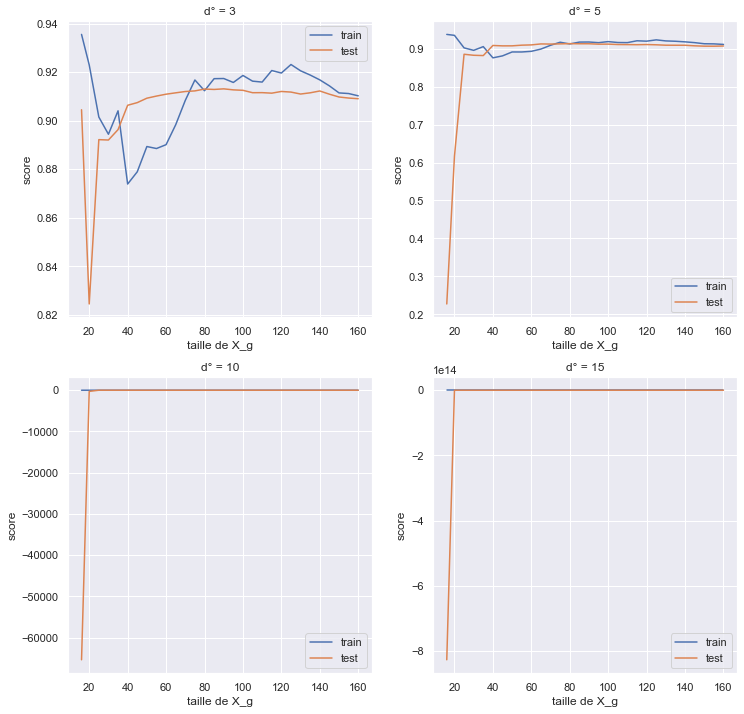

In [27]:
plt.figure(figsize=(12, 12))
t = 221

for d in [3, 5, 10, 15]:
    N, train_scores, test_scores = learning_curve(estimator=ma_regression(d), X=X_g, y=y_g,
                                                  train_sizes=np.linspace(0.1, 1, 30), cv=5)
    plt.subplot(t)
    plt.title(f'd° = {d}')
    plt.plot(N, np.median(train_scores, axis=1), label="train")
    plt.plot(N, np.median(test_scores, axis=1), label="test")
    plt.xlabel("taille de X_g")
    plt.ylabel("score")
    t += 1
    plt.legend()
plt.show()

<font color="blue"/>

<ul>
    <li/> Si d°=3 : Il est inutile d'avoir plus de 125 points dans le dataframe pour optimiser la régression
    <li/> Si d°=5 : Il est inutile d'avoir plus de 75 points dans le dataframe pour optimiser la régression
    <li/> Si d°=10 : Il est inutile d'avoir plus de 20 points dans le dataframe pour optimiser la régression
    <li/> Si d°=15 : Il est inutile d'avoir plus de 20 points dans le dataframe pour optimiser la régression
</ul>

## Grid search

Ici, on va faire de la recherche d'hyperparamètres en examinant de nombreuses valeurs pour plusieurs paramètres : on construit une grille de plusieurs valeurs possible. On fait ce qu'on appelle du *grid search* qui est en général assez coûteux...

**Question** Charger les données de `dataPlusGrand.csv` dans `X_pg` et `y_pg`

In [28]:
df_pg = pd.read_csv("dataPlusGrand.csv")
X_pg, y_pg = np.array(df_pg[["x"]]), np.array(df_pg[["t"]])
Xpg_train, Xpg_test, ypg_train, ypg_test = train_test_split(X_pg, y_pg, test_size=2/5)

**Question** faire un pipeline avec une transformation polynomiale des attributs et un estimateur de la classe `Ridge`

In [29]:
from sklearn.linear_model import Ridge
#Ridge?

In [30]:
def mon_ridge(d=2):
    return make_pipeline(PolyFeat(d), Ridge())

**Question** Regarder l'aide sur `GridSearchCV`. Composer une grille de recherche en examinant tous les degres entre 1 et 15 et pour les valeurs de alpha dans l'ensemble `[1e-3, 1e-2, 1e-1, 1]`

In [31]:
from sklearn.model_selection import GridSearchCV as GridSearch

In [32]:
param_grid = {"polynomialfeatures__degree": np.arange(1,15+1),
              "ridge__alpha": [1e-3, 1e-2, 1e-1, 1]}

grid = GridSearch(estimator=mon_ridge(), param_grid=param_grid, cv=5)
grid.fit(Xpg_train, ypg_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'ridge__alpha': [0.001, 0.01, 0.1, 1]})

**Question** Quels sont les meilleurs paramètres ? Quel est le score du meilleur modèle sur `X_pg`, `y_pg` ?

In [33]:
grid.best_score_

0.908655818885358

In [34]:
grid.best_params_

{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.001}